# Разрез графа. Матрица Лапласа.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 5: Выявление сообществ в сетях 2. Спектральные методы"
* Документация:
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cuts.cut_size.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cuts.normalized_cut_size.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.laplacianmatrix.laplacian_matrix.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cuts.volume.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
    * https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

## Вопросы для совместного обсуждения

1\. Обсудите понятия разреза графа и матрицы Лапласа.

In [1]:
import networkx as nx

In [2]:
G = nx.karate_club_graph()
A = nx.adjacency_matrix(G, weight=None).toarray()
A

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [3]:
import numpy as np

u, v = np.linalg.eig(A)

In [4]:
u.argmin(), u[2]

(2, (-4.4872291941622535+0j))

In [5]:
v[:,2] # v[2] - неправильно!!!

array([ 0.31716992+0.j,  0.12496128+0.j,  0.02726159+0.j, -0.01922241+0.j,
       -0.04807417+0.j, -0.05337592+0.j, -0.05337592+0.j, -0.10032257+0.j,
       -0.2204497 +0.j, -0.12216865+0.j, -0.04807417+0.j, -0.0706828 +0.j,
       -0.06639899+0.j, -0.21641584+0.j, -0.17879433+0.j, -0.17879433+0.j,
        0.02379015+0.j, -0.098531  +0.j, -0.17879433+0.j, -0.21462428+0.j,
       -0.17879433+0.j, -0.098531  +0.j, -0.17879433+0.j, -0.14433815+0.j,
        0.06572081+0.j,  0.07710226+0.j, -0.08777588+0.j, -0.10464841+0.j,
       -0.06258662+0.j, -0.12706663+0.j, -0.15751428+0.j, -0.26735819+0.j,
        0.281354  +0.j,  0.52093712+0.j])

## Задачи для самостоятельного решения

In [6]:
import networkx as nx
from itertools import combinations, product
import numpy as np

<p class="task" id="1"></p>

1\. Задан граф `G`. Определите два разреза:

*  $C^{(1)}=(N_1^{(1)}, N_2^{(1)})$, $N_1^{(1)} = \{0, 1, 2, 3, 4\}$, $N_2^{(1)} = \{5, 6, 7, 8, 9\} $
*  $C^{(2)}=(N_1^{(2)}, N_2^{(2)})$, $N_1^{(2)} = \{0, 1, 2, 3, 4, 5, 6, 7, 8\}$, $N_2^{(2)} = \{9\} $

Для каждого из разрезов вычислите величину $Q^{(k)}$ двумя способами: явным образом просмотрев все ребра и при помощи функции из пакета `networkx`. Выведите величины разрезов на экран.

$$Q^{(k)}=cut(N_1^{(k)},N_2^{(k)})=\sum_{i \in N_1^{(k)}, j \in N_2^{(k)}} l_{ij}$$

- [ ] Проверено на семинаре

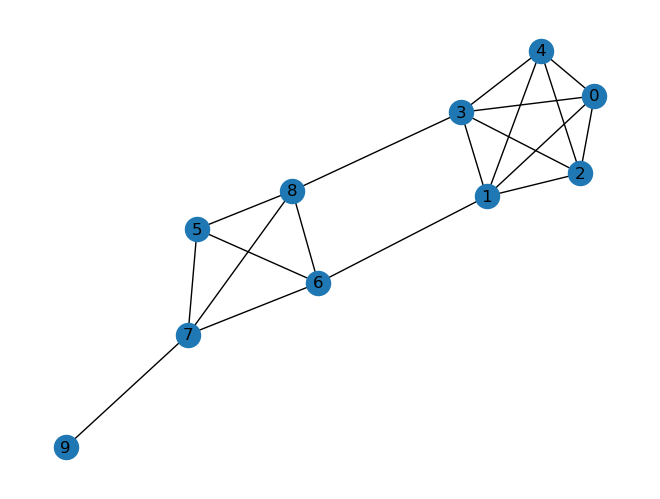

In [7]:
G = nx.Graph()
G.add_edges_from(combinations(range(5), 2))
G.add_edges_from(combinations(range(5, 9), 2))
G.add_edges_from([(8, 3), (6, 1), (7, 9)])
pos = nx.spring_layout(G, seed=30)
nx.draw(G, pos=pos, with_labels=True)

In [8]:
N1_1, N2_1 = {0, 1, 2, 3, 4}, {5, 6, 7, 8, 9}
N1_2, N2_2 = {0, 1, 2, 3, 4, 5, 6, 7, 8}, {9}

Q1 = sum(l in G.edges() for l in product(N1_1, N2_1))
Q2 = sum(l in G.edges() for l in product(N1_2, N2_2))
Q1, Q2

(2, 1)

In [9]:
nx.cut_size(G, N1_1, N2_1), nx.cut_size(G, N1_2, N2_2)

(2, 1)

<p class="task" id="2"></p>

2\. Для разрезов из предыдущего задания вычислите

$$ Vol(N_t^{(k)}) = \sum_{i \in N_t^{(k)}, j \in N} l_{ij}=\sum_{i \in N_t^{(k)}} k_{i}, t=1,2 $$

$$Q_{normalized}^{(k)}=\frac{cut(N_1^{(k)},N_2^{(k)})}{Vol(N_1^{(k)})}+\frac{cut(N_1^{(k)},N_2^{(k)})}{Vol(N_2^{(k)})}$$
и
$$Q_{quotient}^{(k)}=\frac{cut(N_1^{(k)},N_2^{(k)})}{\min(Vol(N_1^{(k)}),Vol(N_2^{(k)}))}$$

Для каждого разреза выведите четыре величины $Vol(N_1^{(k)})$, $Vol(N_2^{(k)})$, $Q_{normalized}^{(k)}$ и $Q_{quotient}^{(k)}$ на экран.
- [ ] Проверено на семинаре

In [10]:
Vol_N1_1, Vol_N2_1, Vol_N1_2, Vol_N2_2 = (sum(dict(G.degree(N)).values())
                                              for N in [N1_1, N2_1, N1_2, N2_2])

Q_1_norm = Q1 / Vol_N1_1 + Q1 / Vol_N2_1
Q_2_norm = Q2 / Vol_N1_2 + Q2 / Vol_N2_2

Q_1_q = Q1 / min(Vol_N1_1, Vol_N2_1)
Q_2_q = Q2 / min(Vol_N1_2, Vol_N2_2)

In [11]:
print(f'Разрез 1\n Vol_1: {Vol_N1_1}, Vol_2: {Vol_N2_1}\n Q_normalized: {Q_1_norm:.4f} \n Q_quotient: {Q_1_q}', end='\n\n')
print(f'Разрез 2\n Vol_1: {Vol_N1_2}, Vol_2: {Vol_N2_2}\n Q_normalized: {Q_2_norm:.4f} \n Q_quotient: {Q_2_q}')

Разрез 1
 Vol_1: 22, Vol_2: 16
 Q_normalized: 0.2159 
 Q_quotient: 0.125

Разрез 2
 Vol_1: 37, Vol_2: 1
 Q_normalized: 1.0270 
 Q_quotient: 1.0


<p class="task" id="3"></p>

3\. Для графа `G` из задания 1 вычислите матрицу Лапласа двумя способами:
* по формуле $\mathbf{L}=\mathbf{D}-\mathbf{A}$;
* используя готовую функцию из `networkx`.

Выведите полученные матрицы на экран и покажите, что они равны.

- [ ] Проверено на семинаре

In [12]:
A = nx.adjacency_matrix(G).toarray()
D = np.diag([G.degree(n) for n in G.nodes()])
L1 = D - A
L1

array([[ 4, -1, -1, -1, -1,  0,  0,  0,  0,  0],
       [-1,  5, -1, -1, -1,  0, -1,  0,  0,  0],
       [-1, -1,  4, -1, -1,  0,  0,  0,  0,  0],
       [-1, -1, -1,  5, -1,  0,  0,  0, -1,  0],
       [-1, -1, -1, -1,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3, -1, -1, -1,  0],
       [ 0, -1,  0,  0,  0, -1,  4, -1, -1,  0],
       [ 0,  0,  0,  0,  0, -1, -1,  4, -1, -1],
       [ 0,  0,  0, -1,  0, -1, -1, -1,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  1]])

In [13]:
L2 = nx.laplacian_matrix(G).toarray()
np.allclose(L1, L2)

True

<p class="task" id="4"></p>

4\. Для каждого из разрезов первого задания вычислите величины $Q^{(k)}$, воспользовавшись матрицей Лапласа.

- [ ] Проверено на семинаре

In [14]:
def lap_cut(G, N1, N2):
    f = np.zeros(len(G))
    f[list(N1)] = 1
    f[list(N2)] = -1

    return 0.25 * f.T @ L2 @ f

lap_cut(G, N1_1, N2_1), lap_cut(G, N1_2, N2_2)

(2.0, 1.0)

<p class="task" id="5"></p>

5\. Найдите собственные значения и собственные векторы матрицы Лапласа. Выведите на экран кратность нулевого собственного значения матрицы Лапласа. Найдите и выведите на экран количество компонент связности в графе `G`.

Создайте копию графа `G` с удаленными ребрами в соответствии с разрезом $C^{(1)}$. Повторите решение задачи для получившегося несвязного графа.

- [ ] Проверено на семинаре

In [15]:
sum(np.isclose(np.linalg.eigvals(L2), 0)), nx.number_connected_components(G)

(1, 1)

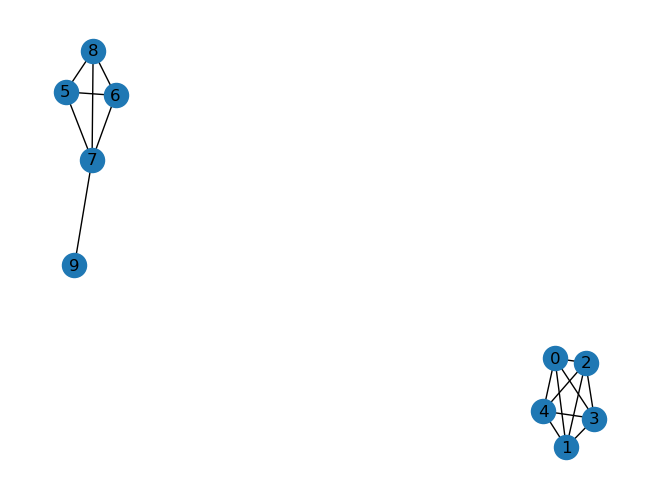

In [16]:
G2 = G.copy()

G2.remove_edges_from(e for e in product(N1_1, N2_1) if e in G.edges()) 
pos = nx.spring_layout(G2, seed=30)
nx.draw(G2, pos=pos, with_labels=True)

In [17]:
L = nx.laplacian_matrix(G2).toarray()
sum(np.isclose(np.linalg.eigvals(L), 0)), nx.number_connected_components(G2)

(2, 2)